In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from river import drift

In [6]:
import pandas as pd

df = pd.read_csv("melbourne_daily.csv")

df['timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df[['timestamp', 'Maximum temperature (Degree C)']]
df.columns = ['timestamp', 'value']
df = df.dropna()
df.set_index('timestamp', inplace=True)

df.head()

58322

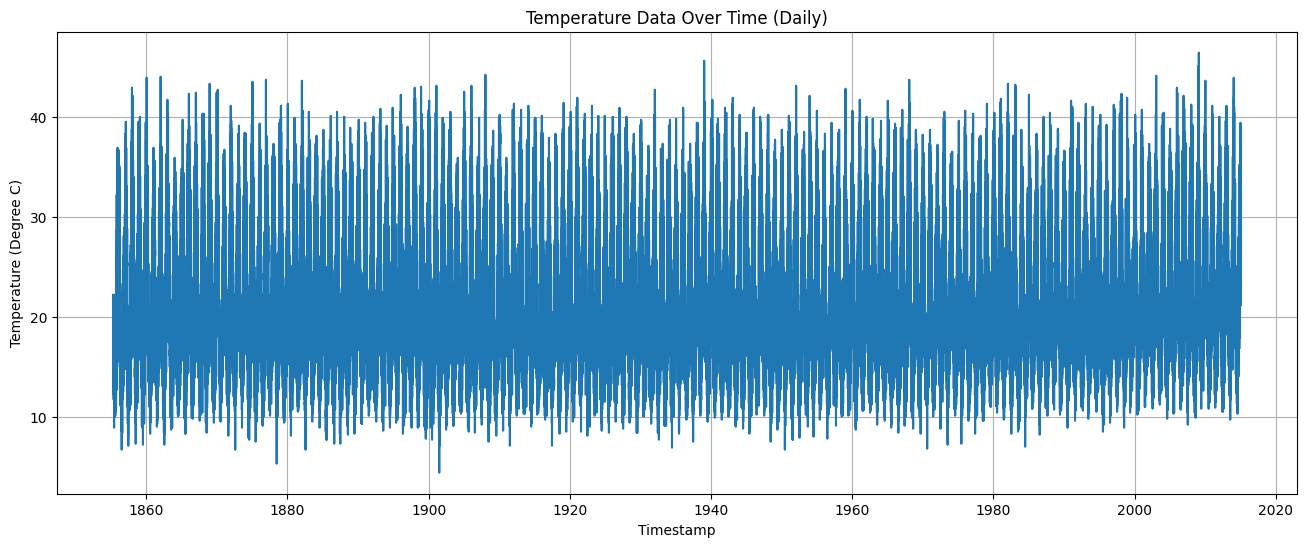

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df.value,)
plt.title('Temperature Data Over Time (Daily)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Degree C)')
plt.grid(True)
plt.show()

# Resampling the Data (Weekly / Monthly)

In [5]:
weekly_data = df.resample('W').mean()
monthly_data = df.resample('ME').mean()
len(weekly_data)

8333

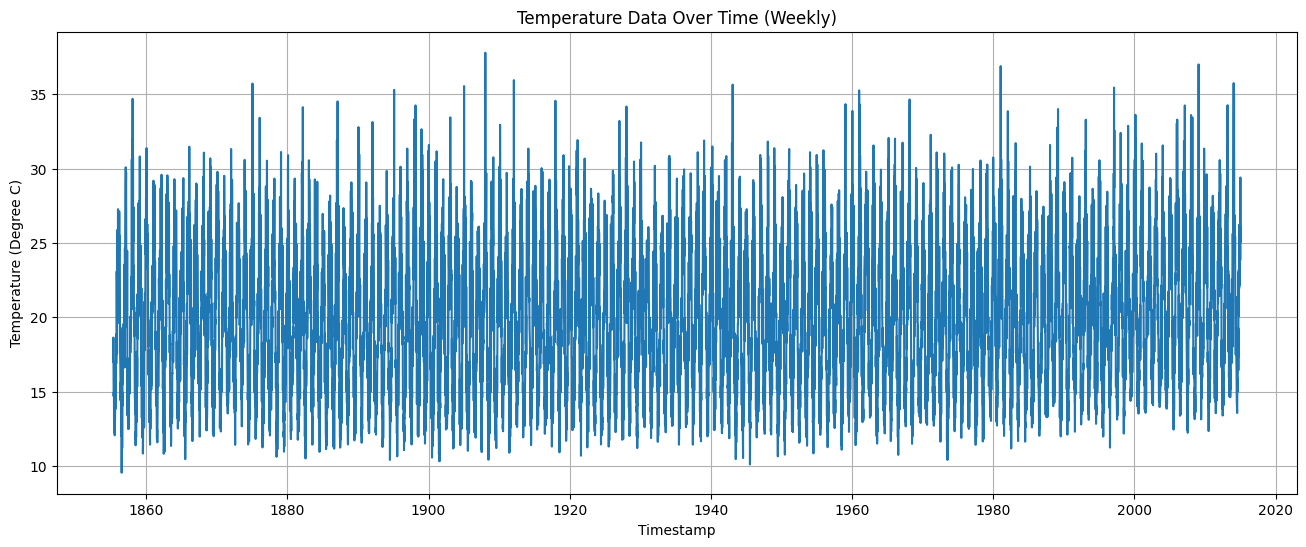

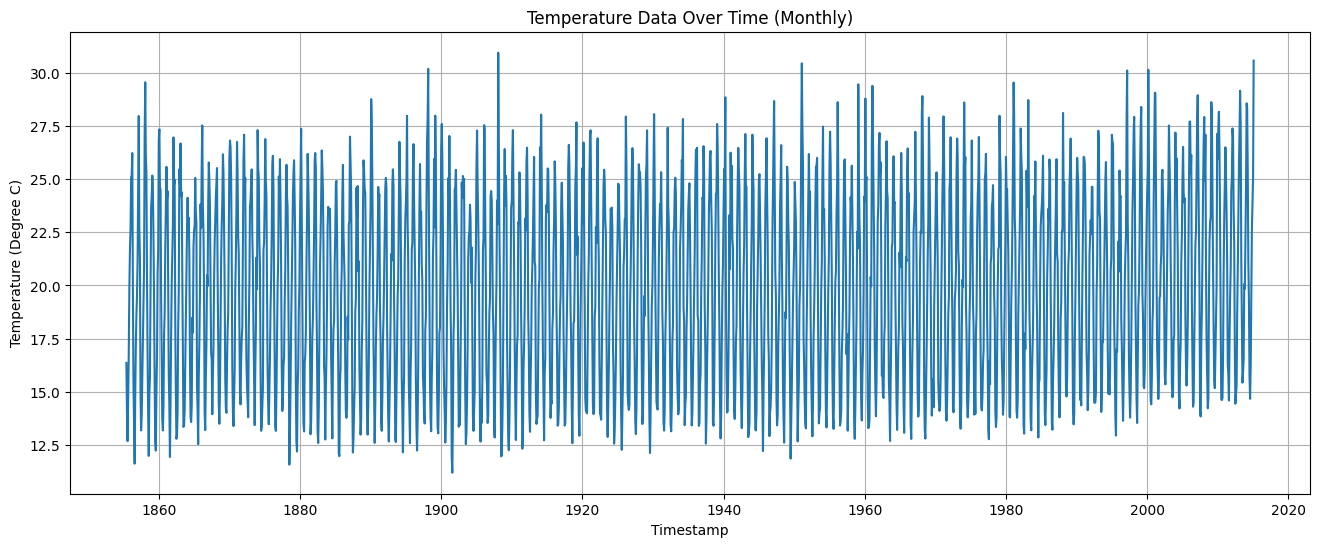

In [116]:
plt.figure(figsize=(16, 6))
plt.plot(weekly_data.index, weekly_data.value,)
plt.title('Temperature Data Over Time (Weekly)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Degree C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(monthly_data.index, monthly_data.value,)
plt.title('Temperature Data Over Time (Monthly)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Degree C)')
plt.grid(True)
plt.show()

# ADWIN on Data

## Daily

Change detected at index 1799, input value: 29.0
Change detected at index 3599, input value: 21.1
Change detected at index 7499, input value: 25.9
Change detected at index 9299, input value: 20.1
Change detected at index 11099, input value: 13.3
Change detected at index 13099, input value: 21.1
Change detected at index 15099, input value: 17.7
Change detected at index 18499, input value: 30.6
Change detected at index 21399, input value: 20.7
Change detected at index 23199, input value: 17.6
Change detected at index 24999, input value: 10.4
Change detected at index 26999, input value: 21.0
Change detected at index 28799, input value: 38.7
Change detected at index 30299, input value: 29.7
Change detected at index 32099, input value: 20.1
Change detected at index 33899, input value: 20.1
Change detected at index 36799, input value: 31.8
Change detected at index 39699, input value: 19.7
Change detected at index 42599, input value: 20.4
Change detected at index 44399, input value: 16.4
Chan

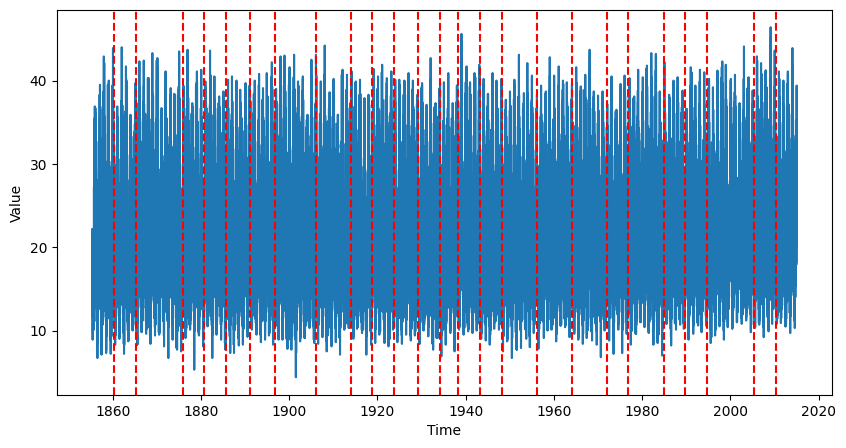

In [117]:
data = df.value

times = list(data.index)

drifts = []

adwin = drift.ADWIN(delta=0.00001,
                    max_buckets=2,
                    grace_period=10,
                    min_window_length=365,
                    clock=100
                   )

for i, val in enumerate(data):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

plt.figure(figsize=(10, 5)) 
plt.plot(times, data)  

for index in drifts:
    datetime_index_at_i = times[index]
    plt.axvline(x=datetime_index_at_i, color='red', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Weekly

Change detected at index 344, input value: 20.071428571428573
Change detected at index 1769, input value: 27.057142857142857
Change detected at index 2009, input value: 21.685714285714287
Change detected at index 2309, input value: 14.285714285714286
Change detected at index 2549, input value: 19.442857142857143
Change detected at index 2789, input value: 21.97142857142857
Change detected at index 3134, input value: 15.242857142857144
Change detected at index 3479, input value: 26.557142857142857
Change detected at index 3884, input value: 16.357142857142858
Change detected at index 4094, input value: 26.314285714285713
Change detected at index 4304, input value: 21.2
Change detected at index 4649, input value: 14.142857142857142
Change detected at index 4949, input value: 25.442857142857143
Change detected at index 5189, input value: 18.557142857142857
Change detected at index 6104, input value: 19.271428571428572
Change detected at index 7154, input value: 12.799999999999999


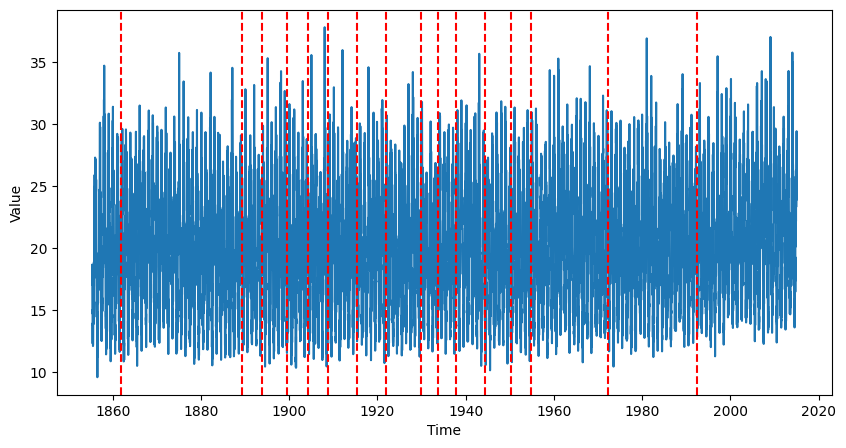

In [118]:
data = weekly_data.value

times = list(weekly_data.index)

drifts = []

adwin = drift.ADWIN(delta=0.0001,
                    max_buckets=6,
                    grace_period=10,
                    min_window_length=20,
                    clock=15
                   )

for i, val in enumerate(data):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

plt.figure(figsize=(10, 5)) 
plt.plot(times, data)  

for index in drifts:
    datetime_index_at_i = times[index]
    plt.axvline(x=datetime_index_at_i, color='red', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Monthly

Change detected at index 89, input value: 19.738709677419354
Change detected at index 851, input value: 20.823333333333334
Change detected at index 1133, input value: 19.23548387096774
Change detected at index 1271, input value: 21.71333333333333
Change detected at index 1409, input value: 19.780645161290323
Change detected at index 1499, input value: 21.59


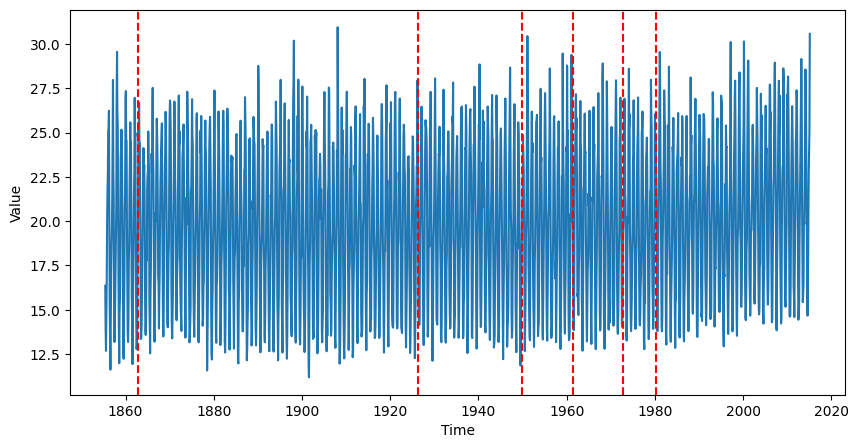

In [119]:
data = monthly_data.value

times = list(monthly_data.index)

drifts = []

adwin = drift.ADWIN(delta=0.2,
                    max_buckets=5,
                    grace_period=10,
                    min_window_length=10,
                    clock=1
                   )

for i, val in enumerate(data):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

plt.figure(figsize=(10, 5)) 
plt.plot(times, data)  

for index in drifts:
    datetime_index_at_i = times[index]
    plt.axvline(x=datetime_index_at_i, color='red', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Synthesize Anomalies

## Daily

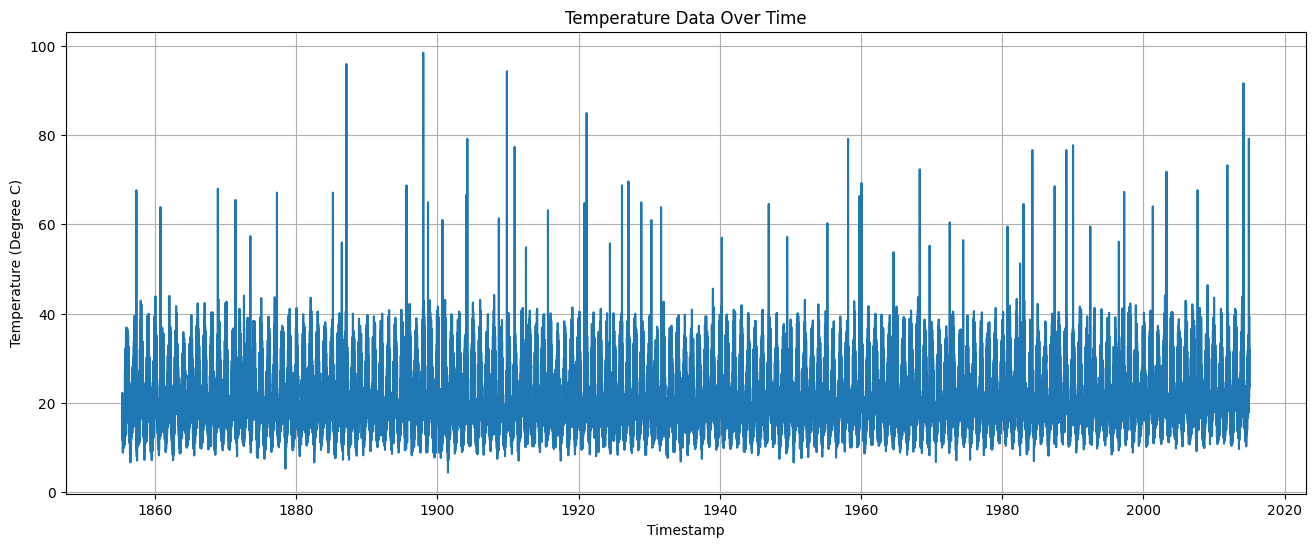

In [120]:
def celsius_to_fahrenheit(celsius):
    return celsius * 9/5 + 32

df['anomalous'] = False

num_anomalies = int(0.001 * len(df))

anomaly_indices = np.random.choice(df.index, size=num_anomalies, replace=False)

df.loc[anomaly_indices, 'value'] = df.loc[anomaly_indices, 'value'].apply(celsius_to_fahrenheit)
df.loc[anomaly_indices, 'anomalous'] = True

df.to_csv("melbourne_daily_anomalies.csv")

plt.figure(figsize=(16, 6))
plt.plot(df.index, df.value,)
plt.title('Temperature Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Degree C)')
plt.grid(True)
plt.show()

In [121]:
num_anomalies

58

## Weekly

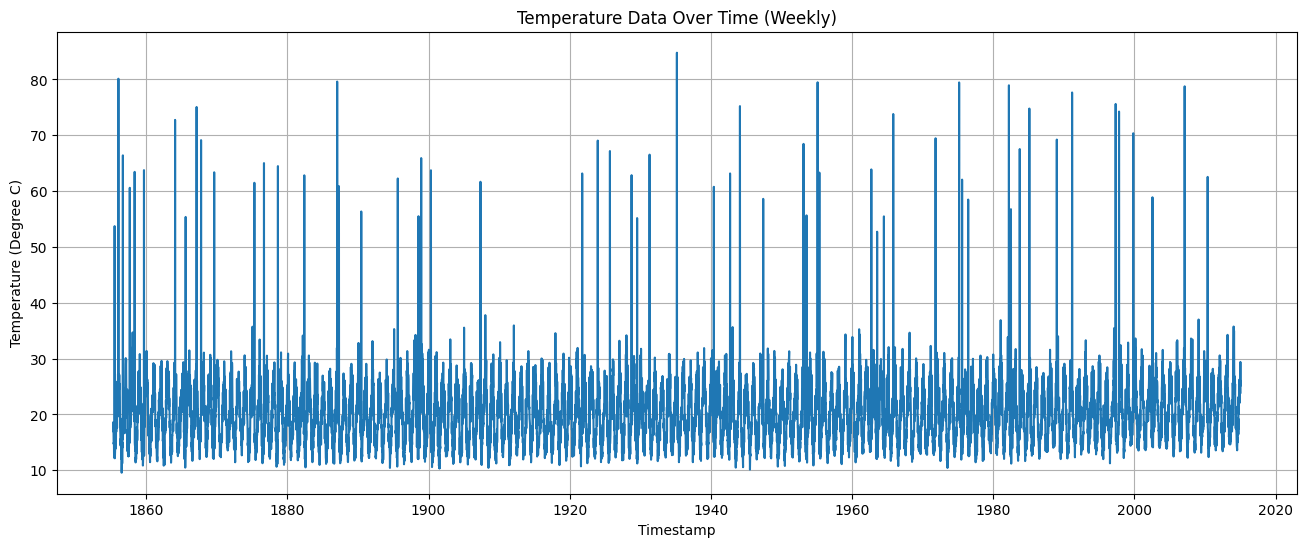

In [122]:
weekly_data['anomalous'] = False

num_anomalies = int(0.001 * len(df))

anomaly_indices = np.random.choice(weekly_data.index, size=num_anomalies, replace=False)

weekly_data.loc[anomaly_indices, 'value'] = weekly_data.loc[anomaly_indices, 'value'].apply(celsius_to_fahrenheit)
weekly_data.loc[anomaly_indices, 'anomalous'] = True

weekly_data.to_csv("melbourne_weekly_anomalies.csv")

plt.figure(figsize=(16, 6))
plt.plot(weekly_data.index, weekly_data.value,)
plt.title('Temperature Data Over Time (Weekly)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Degree C)')
plt.grid(True)
plt.show()

In [123]:
num_anomalies

58

## Monthly

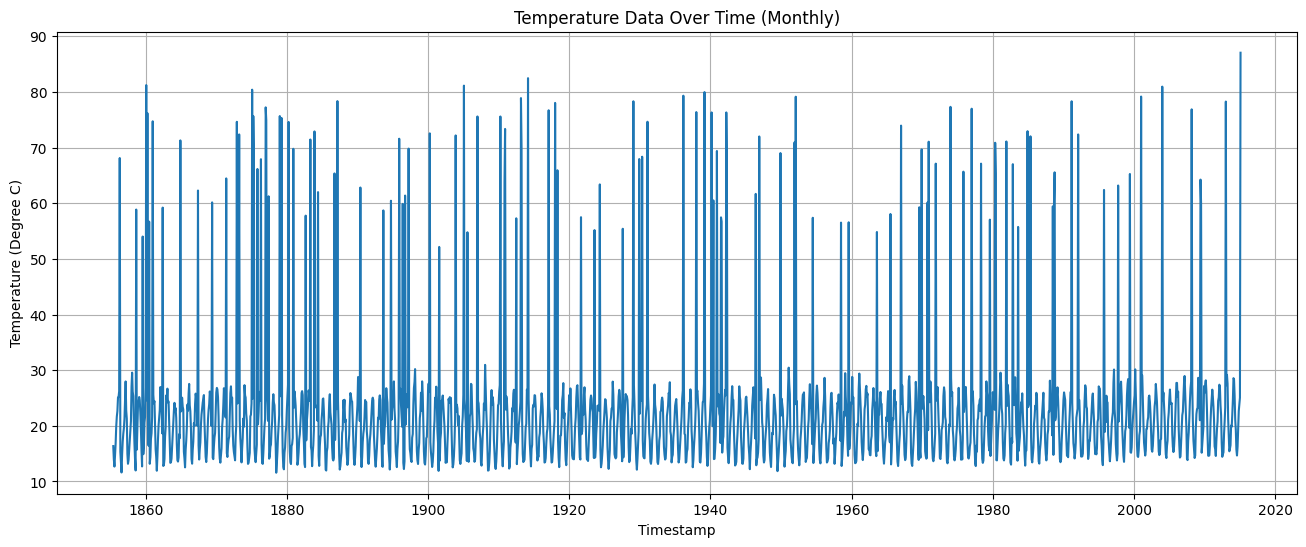

In [111]:
monthly_data['anomalous'] = False

num_anomalies = int(0.002 * len(df))

anomaly_indices = np.random.choice(monthly_data.index, size=num_anomalies, replace=False)

monthly_data.loc[anomaly_indices, 'value'] = monthly_data.loc[anomaly_indices, 'value'].apply(celsius_to_fahrenheit)
monthly_data.loc[anomaly_indices, 'anomalous'] = True

monthly_data.to_csv("melbourne_monthly_anomalies.csv")

plt.figure(figsize=(16, 6))
plt.plot(monthly_data.index, monthly_data.value,)
plt.title('Temperature Data Over Time (Monthly)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Degree C)')
plt.grid(True)
plt.show()